<a href="https://colab.research.google.com/github/AliUmrani07/Machine-Learning-Codes/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
df = pd.read_csv('/content/drive/MyDrive/Sales data.csv')

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [40]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [42]:
#Check the null values
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# Skewness and Kurtosis
print("\nSkewness:")
print(df.skew())
print("\nKurtosis:")
print(df.kurtosis())


Skewness:
TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

Kurtosis:
TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.640075
dtype: float64


In [12]:
 #Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


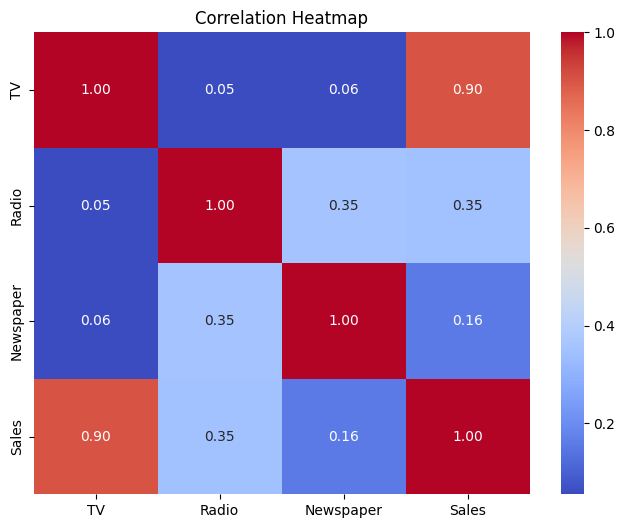

In [13]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


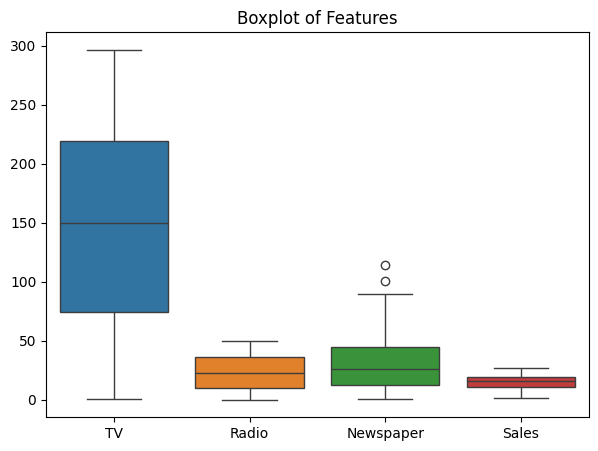

In [19]:
# Boxplots to visualize distributions and outliers
plt.figure(figsize=(7, 5))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()

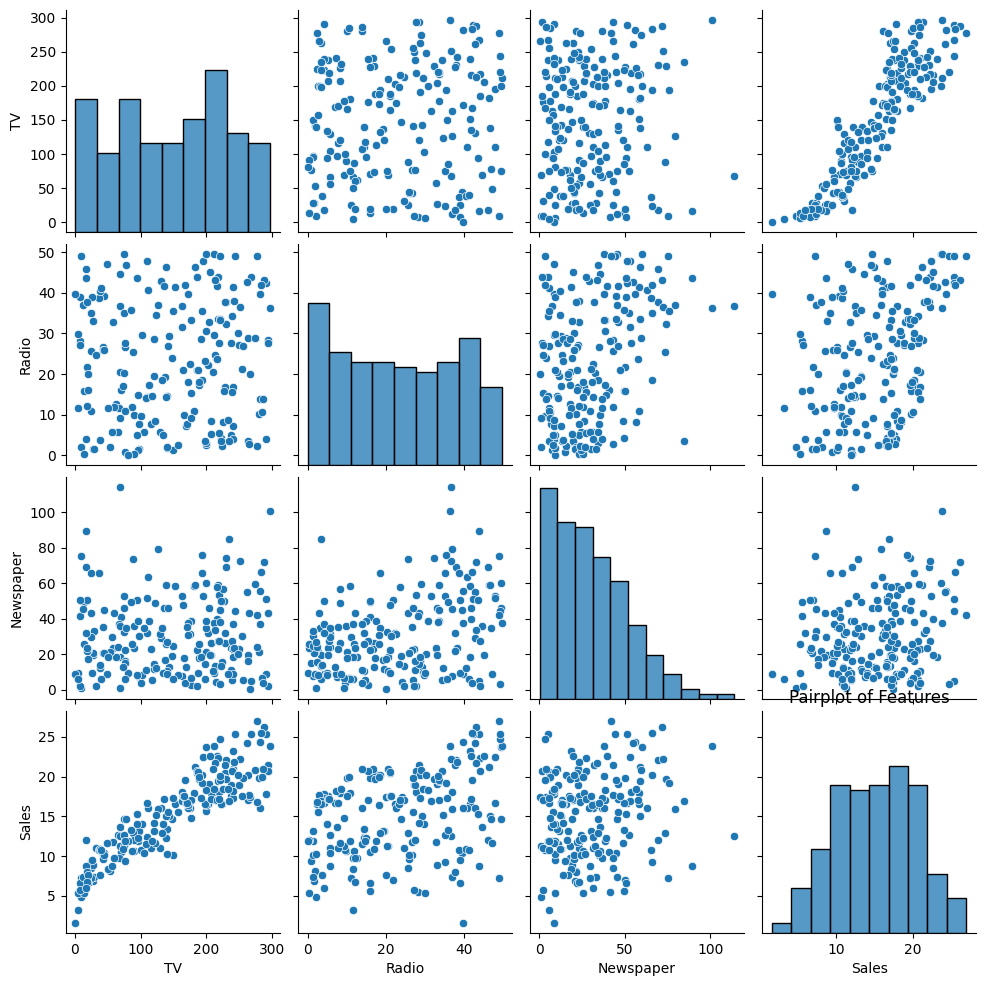

In [20]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.title("Pairplot of Features")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [22]:
# Split the data into features (X) and target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)


In [26]:
y_pred

array([17.179169 , 22.748325 , 20.578192 ,  6.048757 , 23.73541  ,
       14.153012 , 23.15499  ,  9.174483 , 17.041319 , 16.30311  ,
        7.986717 ,  9.807733 , 17.305773 ,  4.1222224, 12.088081 ,
       16.510164 ,  4.040091 , 16.817339 , 11.620045 , 19.739996 ,
       20.458597 , 14.055775 , 10.093833 , 23.586964 , 11.256765 ,
        8.642781 , 23.066692 , 12.699838 , 10.635514 ,  5.959081 ,
       16.411547 , 11.606773 , 22.968414 ,  9.54043  , 20.582659 ,
       20.421392 , 12.6301365, 20.3205   , 12.758793 ,  6.6908307],
      dtype=float32)

In [29]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance (XGBoost):")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R-squared: {r2:.4f}")


Model Performance (XGBoost):
  MAE: 0.8899
  MSE: 1.4514
  RMSE: 1.4514
  R-squared: 0.9530


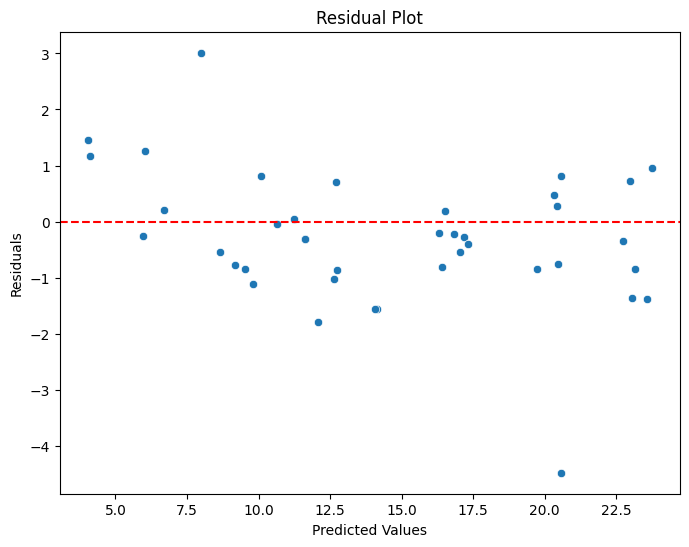

In [31]:
# Residual analysis
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

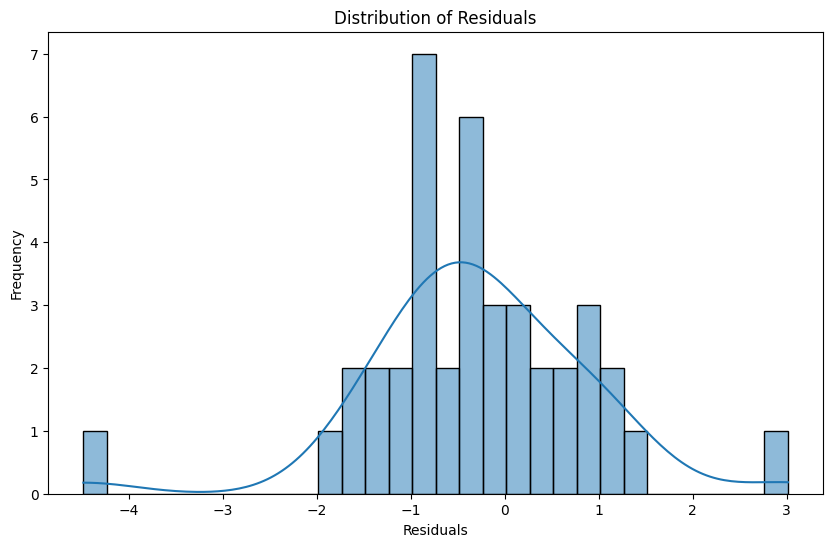

In [32]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

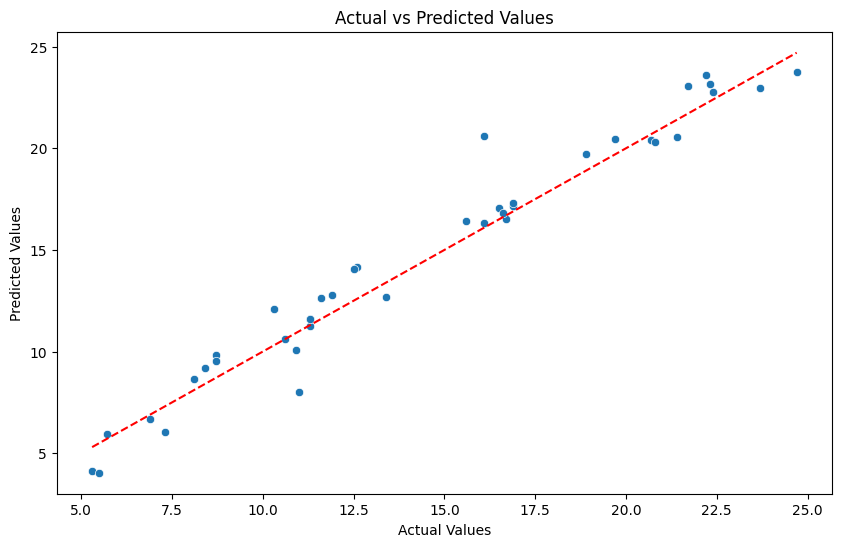

In [33]:
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [36]:
# Truth table for predictions
truth_table = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals,
    'Absolute Error': abs(residuals)
})

# Sort by absolute error (largest errors first)
truth_table = truth_table.sort_values(by='Absolute Error', ascending=False)

# Display the truth table
print("\nTruth Table for Predictions:")
print(truth_table.head(10))


Truth Table for Predictions:
     Actual  Predicted  Residual  Absolute Error
150    16.1  20.582659 -4.482659        4.482659
66     11.0   7.986717  3.013283        3.013283
186    10.3  12.088081 -1.788081        1.788081
16     12.5  14.055775 -1.555775        1.555775
115    12.6  14.153012 -1.553012        1.553012
56      5.5   4.040091  1.459909        1.459909
93     22.2  23.586964 -1.386964        1.386964
84     21.7  23.066692 -1.366692        1.366692
158     7.3   6.048757  1.251243        1.251243
78      5.3   4.122222  1.177778        1.177778


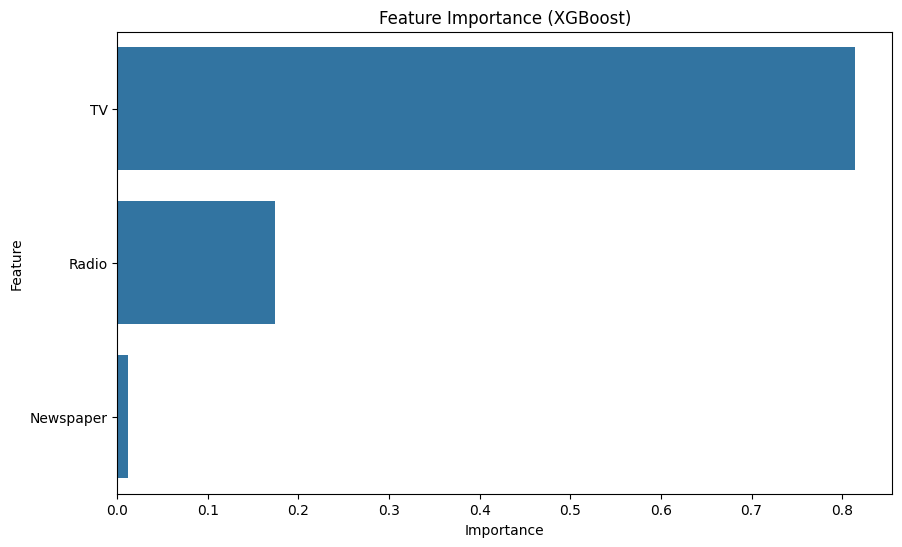

In [37]:
# Feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (XGBoost)")
plt.show()